# EXPERIMENT 23

Suppose I use $T$, $B$ and $\delta = T/B$. To produce one sample, I basically do $B$ bounces, which means I use the gradient $B$ times for HUG and $2B + 1$ for THUG/RHUG. Notice that for a given setting of $(\delta, B)$ one could simply consider $(2\delta, 2B)$ or $(10\delta, 10 B)$ to improve decorrelation and hence ESS. For this reason, we must consider the ESS per gradient computation, which would be $ESS/B$ for HUG and $ESS/(2B+1)$ for THUG/RHUG. 

In [232]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot

In [233]:
folder = "experiment23/"

# HUG
THETA_ESS_HUG = load(folder + "THETA_ESS_HUG.npy")
U_ESS_HUG     = load(folder + "U_ESS_HUG.npy")
ESS_HUG       = load(folder + "ESS_JOINT_HUG.npy")
A_HUG         = load(folder + "A_HUG.npy")
RMSE_HUG      = load(folder + "RMSE_HUG.npy")
EJSD_HUG      = load(folder + "EJSD_HUG.npy")
G_EJSD_HUG    = load(folder + "G_EJSD_HUG.npy")
T_EJSD_HUG    = load(folder + "T_EJSD_HUG.npy")
A_HOP_HUG     = load(folder + "A_HOP_HUG.npy")
N_UNIQUE_HUG  = load(folder + "N_UNIQUE_HUG.npy")
THETA_AC_HUG  = load(folder + "THETA_AC_HUG.npy")
U_AC_HUG      = load(folder + "U_AC_HUG.npy")

# RHUG
THETA_ESS_RHUG = load(folder + "THETA_ESS_RHUG.npy")
U_ESS_RHUG     = load(folder + "U_ESS_RHUG.npy")
ESS_RHUG       = load(folder + "ESS_JOINT_RHUG.npy")
A_RHUG         = load(folder + "A_RHUG.npy")
RMSE_RHUG      = load(folder + "RMSE_RHUG.npy")
EJSD_RHUG      = load(folder + "EJSD_RHUG.npy")
G_EJSD_RHUG    = load(folder + "G_EJSD_RHUG.npy")
T_EJSD_RHUG    = load(folder + "T_EJSD_RHUG.npy")
A_HOP_RHUG     = load(folder + "A_HOP_RHUG.npy")
N_UNIQUE_RHUG  = load(folder + "N_UNIQUE_RHUG.npy")
THETA_AC_RHUG  = load(folder + "THETA_AC_RHUG.npy")
U_AC_RHUG      = load(folder + "U_AC_RHUG.npy")

# COMMON
EPSILONS       = load(folder + "EPSILONS.npy")
ALPHAS         = load(folder + "ALPHAS.npy")
TS             = load(folder + "TS.npy")
time           = load(folder + "TIME.npy")

### THETA ESS

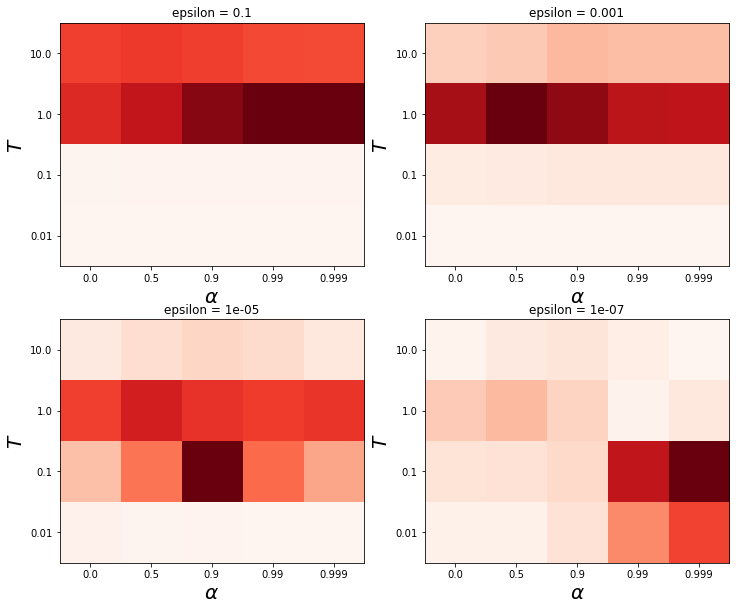

In [235]:
# Get the ESS data. Do not use T=0.01
data_list = [
    np.hstack((THETA_ESS_HUG[:, i, :].mean(axis=0).reshape(-1, 1), THETA_ESS_RHUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
string_ts = [str(T) for T in TS]
string_alphas = ['0.0'] + [str(a) for a in ALPHAS]
# Normalize data
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds')
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

### U ESS

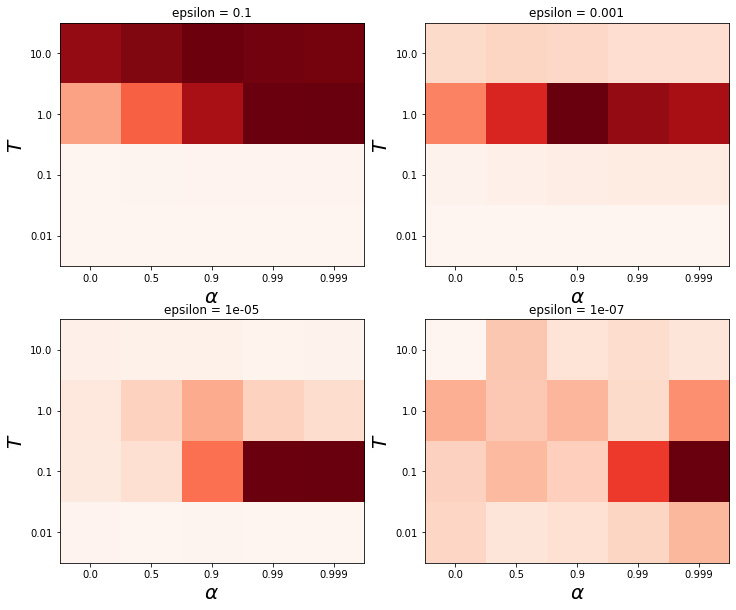

In [236]:
data_list = [
    np.hstack((U_ESS_HUG[:, i, :].mean(axis=0).reshape(-1, 1), U_ESS_RHUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds')
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

### multiESS

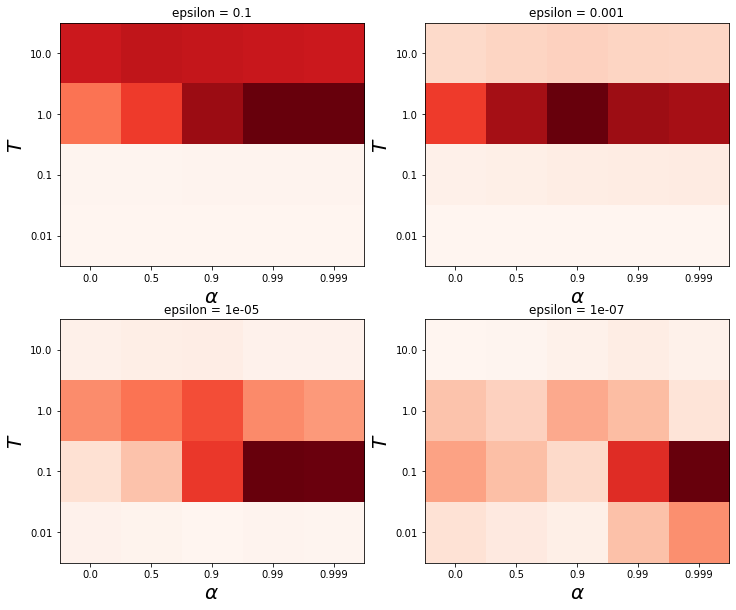

In [237]:
data_list = [
    np.hstack((ESS_HUG[:, i, :].mean(axis=0).reshape(-1, 1), ESS_RHUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds')
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

### Acceptance Probability

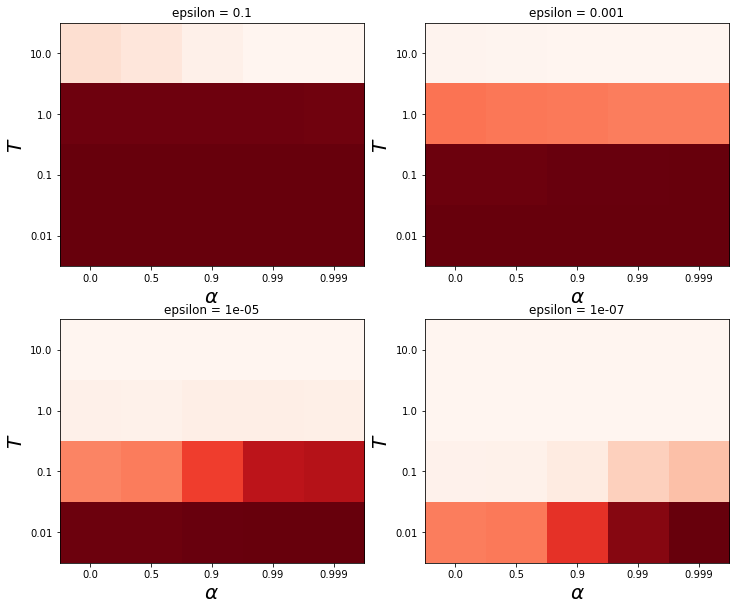

In [260]:
data_list = [
    np.hstack((A_HUG[:, i, :].mean(axis=0).reshape(-1, 1), A_RHUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
#data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds')
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

### EJSD

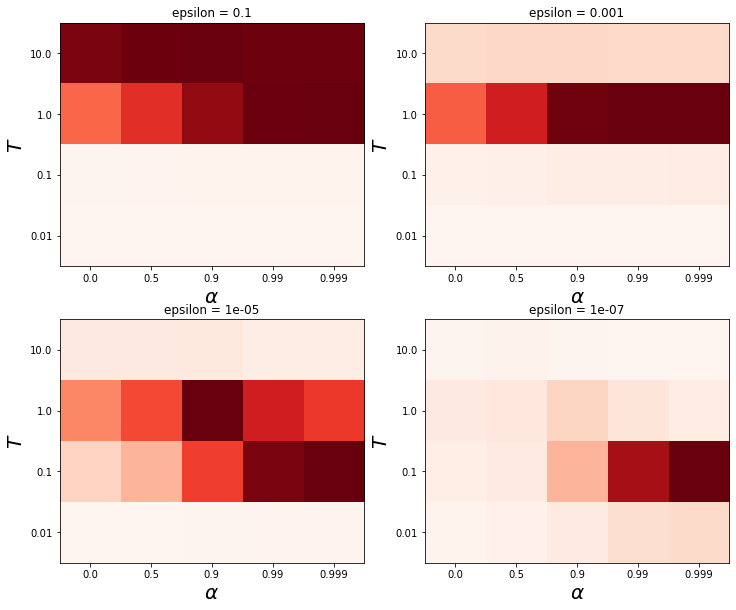

In [239]:
data_list = [
    np.hstack((EJSD_HUG[:, i, :].mean(axis=0).reshape(-1, 1), EJSD_RHUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds')
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

### Autocorrelation lag 20

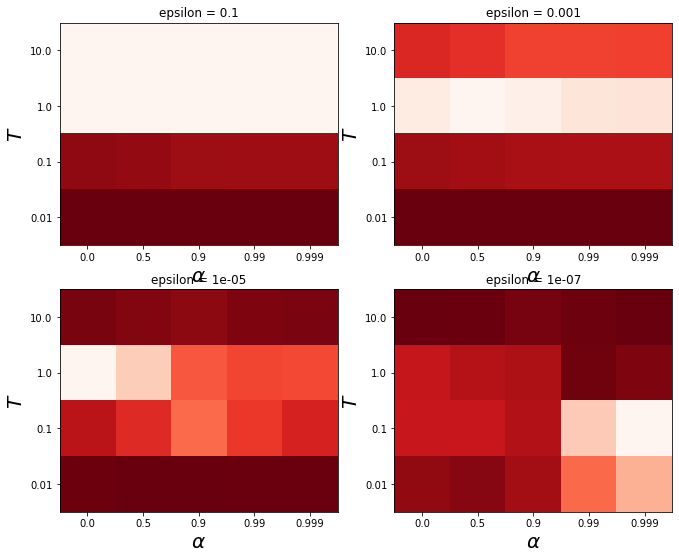

In [240]:
data_list = [
    np.hstack((THETA_AC_HUG[:, i, :, 19].mean(axis=0).reshape(-1, 1), THETA_AC_RHUG[:, i, :, :, 19].mean(axis=0))) for i in range(len(EPSILONS))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11,9))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds')
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

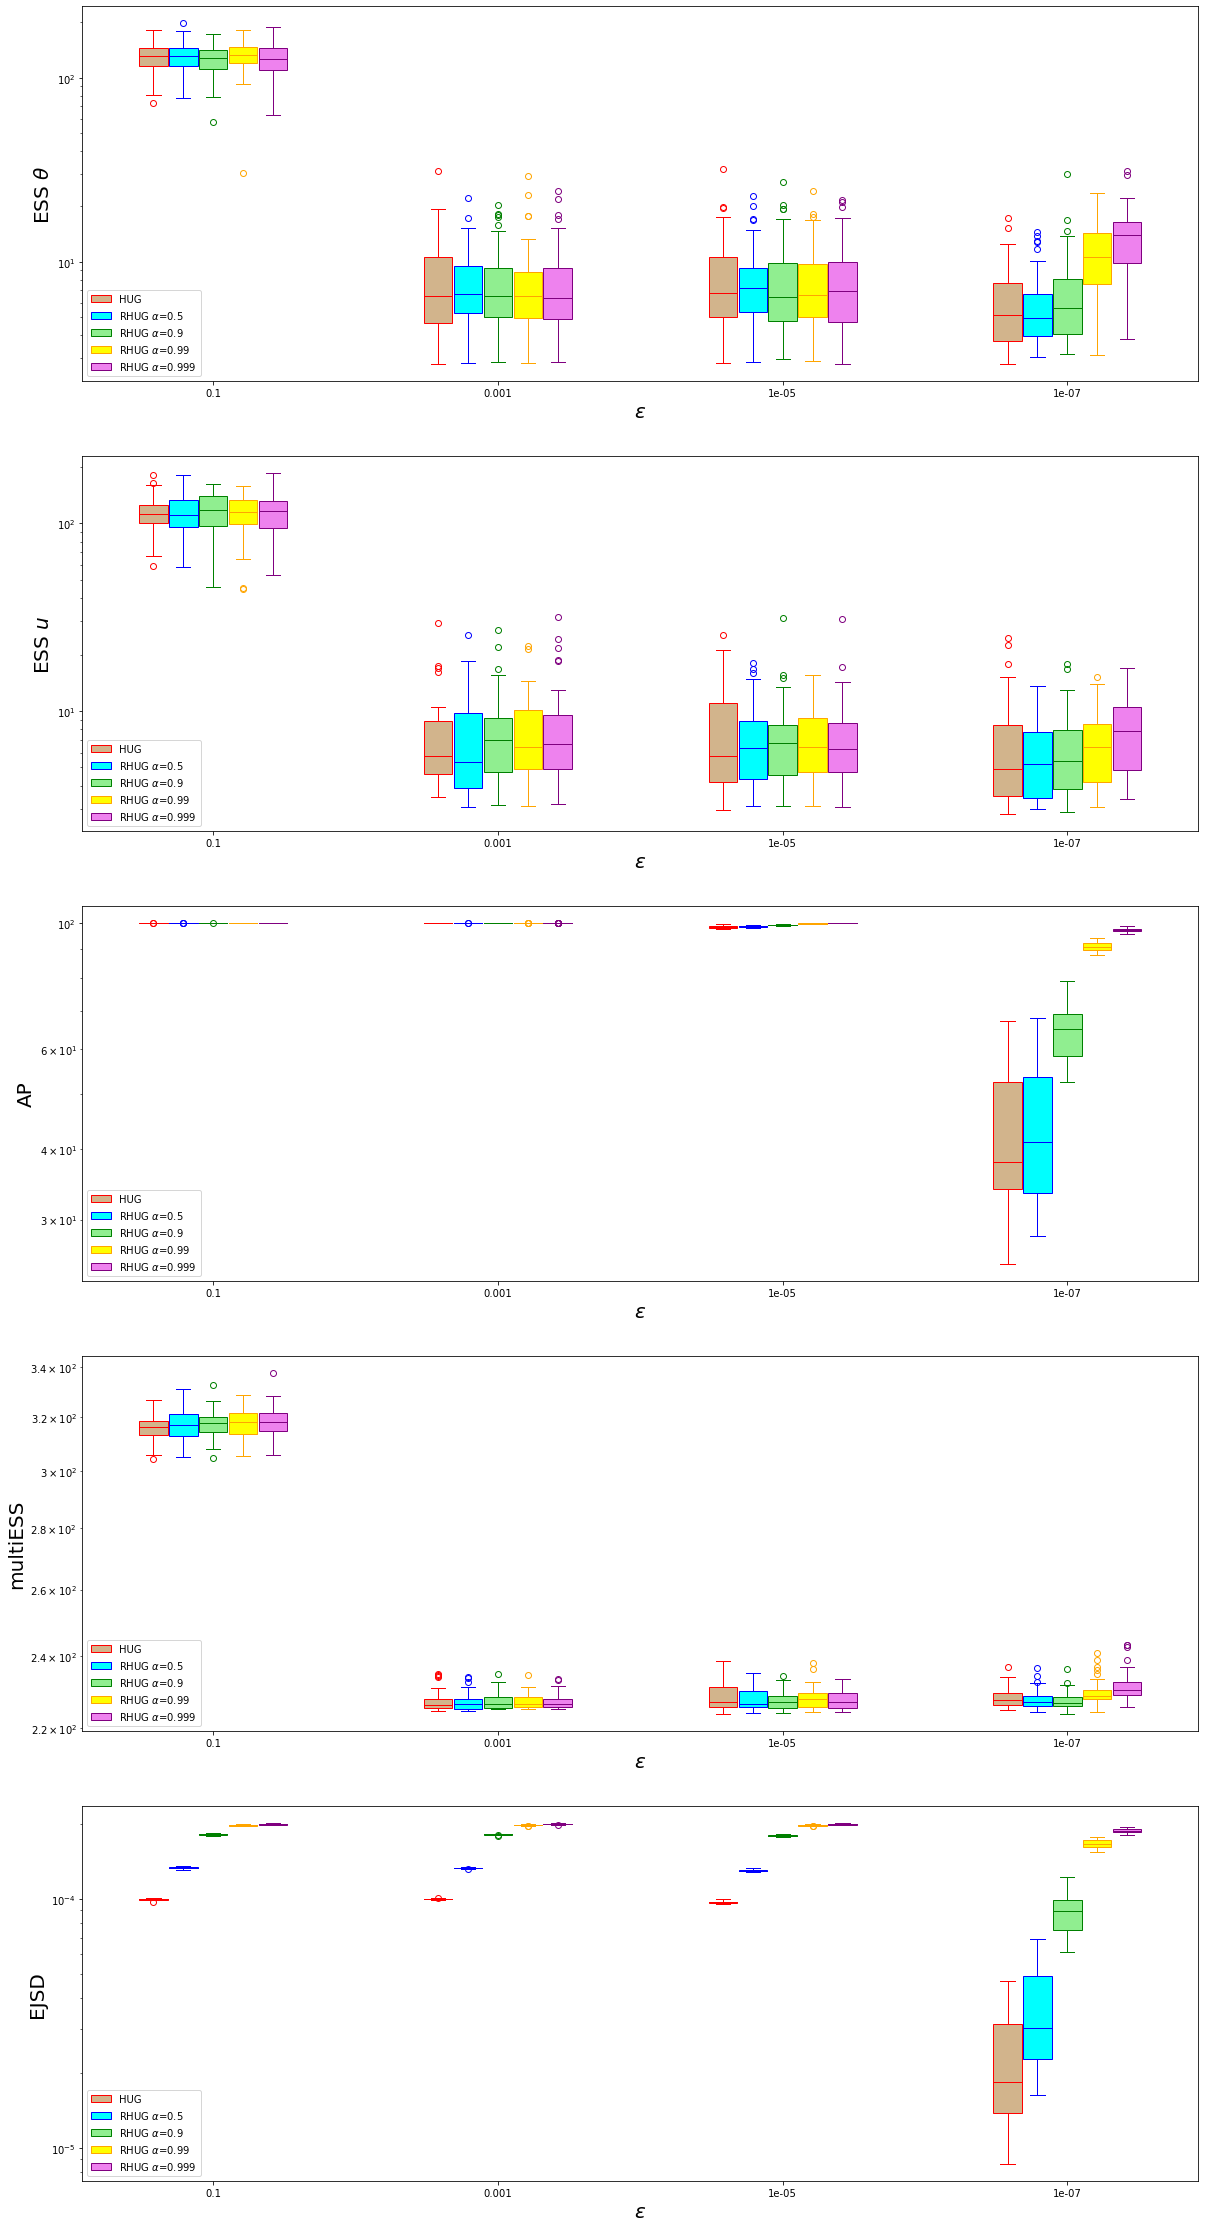

In [273]:
columns = EPSILONS
width = 0.21
thing_that_changes = ALPHAS
n_alphas = len(thing_that_changes)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = n_alphas + 1
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
colors1 = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black']
colors2 = ['tan', 'cyan', 'lightgreen', 'yellow', 'violet', 'orange', 'lightgray']
labels = ['HUG'] + ['RHUG $\\alpha$={}'.format(thing) for thing in thing_that_changes]


index = -1 # T = 0.1

ARRAYS = [
    (THETA_ESS_HUG[:,:,index], THETA_ESS_RHUG[:,:,index,:]),
    (U_ESS_HUG[:,:,index], U_ESS_RHUG[:,:,index,:]),
    (A_HUG[:,:,index], A_RHUG[:,:,index,:]),
    (ESS_HUG[:,:,index], ESS_RHUG[:,:,index,:]),
    (EJSD_HUG[:,:,index], EJSD_RHUG[:,:,index,:])
]
YLABELS = [
    'ESS $\\theta$', 
    'ESS $u$',
    'AP',
    'multiESS',
    'EJSD'
]
n_plots = len(ARRAYS)
fig, ax = plt.subplots(nrows=n_plots, figsize=(20, 8 * n_plots))
for ix, (array1, array2) in enumerate(ARRAYS):
    bp1 = box_plot(ax[ix], array1.T.tolist(), 'red', 'tan', positions[0])
    bps = []
    for i in range(n_alphas):
        bps.append(box_plot(ax[ix], array2[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
    handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
    ax[ix].legend(
        handles, 
        labels, 
        loc='lower left')
    ax[ix].set_xticks(ticks)
    ax[ix].set_xticklabels(columns)
    ax[ix].set_xlabel("$\\epsilon$", fontsize=20)
    ax[ix].set_ylabel(YLABELS[ix], fontsize=20)
    ax[ix].semilogy()

plt.show()